## Project Description 

The objective of this project is to develop a predictive model that can accurately forecast instances of customer default payments in Taiwan. By focusing on risk management, we aim to go beyond a simple binary classification of clients as credible or not credible. Instead, our emphasis is on estimating the probability of default for each customer. This approach provides a more valuable and nuanced understanding of the risk involved.

To assess the effectiveness of our predictive model, we will utilize a K-S chart. This chart allows us to evaluate and compare the performance of our model in identifying customers who are likely to default on their credit card payments. By analyzing the K-S chart, we can make informed decisions and take appropriate actions to mitigate potential default risks.

### Data Description

In this research, we examined the relationship between credit card default and various factors. The response variable, default payment, was represented by a binary variable where "Yes" indicated default (1) and "No" indicated no default (0). To analyze this, we considered a comprehensive set of 23 explanatory variables based on existing literature. 

Here is a detailed description of these variables:

1. X1: Amount of credit given in New Taiwan (NT) dollars, which includes both individual consumer credit and supplementary credit for the consumer's family.

2. X2: Gender, where 1 represents male and 2 represents female.

3. X3: Education level, categorized as follows: 1 = graduate school, 2 = university, 3 = high school, 4 = others.

4. X4: Marital status, classified as follows: 1 = married, 2 = single, 3 = others.

5. X5: Age of the individual in years.

6. X6 - X11: History of past payment. We examined the payment records from April to September 2005, where X6 represents the repayment status in September 2005, X7 represents the repayment status in August 2005, and so on. The scale used for measuring the repayment status is as follows: -1 = payment made duly, 1 = payment delayed by one month, 2 = payment delayed by two months, and so on, up to 9 = payment delayed by nine months or more.

7. X12-X17: Amount of the bill statement in New Taiwan (NT) dollars. X12 represents the bill statement amount in September 2005, X13 represents the bill statement amount in August 2005, and so forth, up to X17 representing the bill statement amount in April 2005.

8. X18-X23: Amount of previous payment in New Taiwan (NT) dollars. X18 represents the amount paid in September 2005, X19 represents the amount paid in August 2005, and so on, up to X23 representing the amount paid in April 2005.

By analyzing these variables, we aim to gain insights into the factors that contribute to credit card default and develop a predictive model for identifying customers at risk of defaulting in the future.

### Project Objective

The objective of our project is to predict potential customers who are likely to default on their credit card payments in the upcoming months. Before delving into the details, let's first understand the definition of credit card default.

1. Understanding Credit Cards
- A credit card is a payment card that allows users to make purchases by utilizing a line of credit instead of using their own cash deposits. When a person uses a credit card for a transaction, they accumulate a balance that needs to be paid off on a monthly basis.

2. Defining Credit Card Default
- Credit card default occurs when an individual becomes significantly delinquent in making their credit card payments. It should be noted that missing a payment or two does not automatically result in default. Defaulting on a credit card payment happens when the Minimum Amount Due is not paid consecutively for several months.

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd 

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the data

df = pd.read_csv('UCI_Credit_Card.csv')
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
22010,22011,100000.0,2,2,2,28,2,2,2,2,...,74322.0,74496.0,76058.0,0.0,3462.0,3700.0,2000.0,2760.0,2776.0,1
4111,4112,280000.0,2,2,1,45,1,-2,-1,-1,...,0.0,0.0,0.0,0.0,3288.0,0.0,0.0,0.0,2942.0,0
7310,7311,90000.0,2,2,2,23,2,3,3,2,...,82117.0,84395.0,85739.0,5900.0,0.0,0.0,3600.0,2900.0,3500.0,1
12984,12985,360000.0,1,1,1,51,0,0,0,0,...,350949.0,355869.0,210989.0,13806.0,12303.0,15005.0,13729.0,7700.0,8000.0,0
28359,28360,160000.0,2,3,2,47,-2,-2,-2,-2,...,396.0,396.0,6396.0,396.0,5345.0,396.0,396.0,6396.0,396.0,0


In [3]:
# Rename the default.payment.next.month column to IsDefaulter
df['IsDefaulter'] = df['default.payment.next.month']
df.drop('default.payment.next.month',axis = 1)

# Descriptive statistics
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,IsDefaulter
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,1.000000


## Data Exploration & Preparing the Data

IsDefaulter
0    23364
1     6636
Name: count, dtype: int64

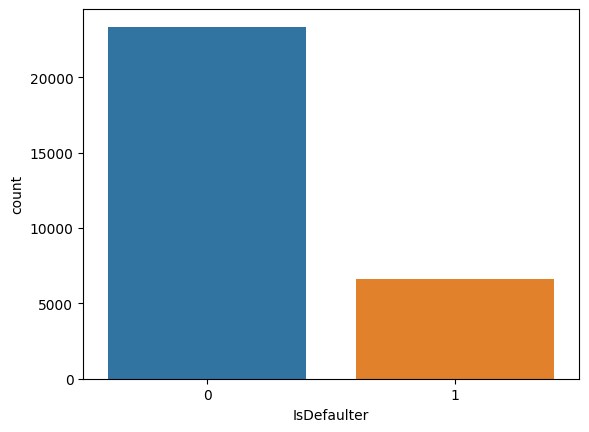

In [4]:
# Exploring the IsDefaulter column

sns.countplot(x = 'IsDefaulter', data = df)
df['IsDefaulter'].value_counts()

# We observe that both classes are not in proportion and we have imbalanced dataset.

### Categorical Variables

That are Sex, Marriage, Education. We want to see both how our dataset is divided and if there are sparse classes which can cause overfit of our models.

In [5]:
# Categgorical Variable - SEX

# 1 - Male
# 2 - Female

df['SEX'].value_counts()
# There are more females than males in the dataset

SEX
2    18112
1    11888
Name: count, dtype: int64

In [6]:
# Categgorical Variable - Marriage

# 1 - married
# 2 - single 
# 3 - others

df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [7]:
# We have few values for 0, which are not determined .so we adding them in Others category.
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

<Axes: xlabel='MARRIAGE'>

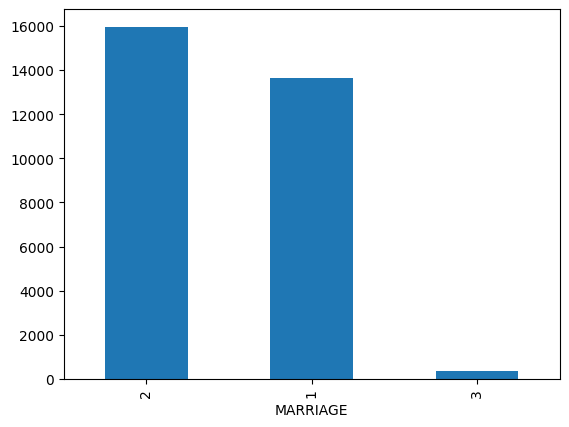

In [8]:
df.MARRIAGE.value_counts().plot(kind = 'bar')

In [9]:
# Categgorical Variable - Education

# 1 = graduate school
# 2 = university
# 3 = high school
# 4 = others

df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [10]:
# As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

#### Observations - Categorical Varaibles

- There are more females credit card holder,so no. of defaulter have high proportion of females.
- No. of defaulters have a higher proportion of educated people (graduate school and university)
- No. of defaulters have a higher proportion of Singles.

### Numerical Variables

That are Limit Balance, Age, Bill Amount, History Payment Status, Paid Amount. 

In [11]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

<Axes: xlabel='IsDefaulter', ylabel='LIMIT_BAL'>

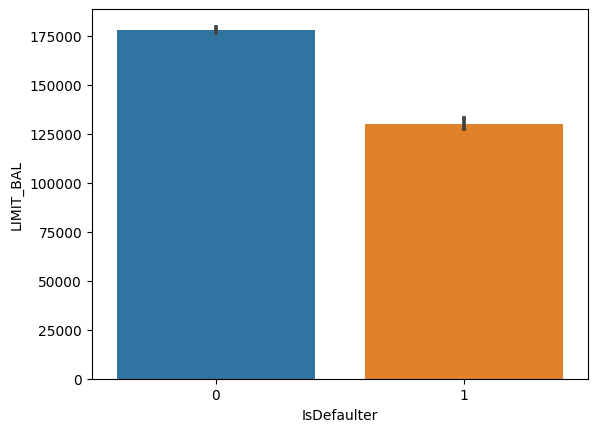

In [12]:
# Numerical Variable - Limit Balance
# df.LIMIT_BAL.hist(bins = 20)
sns.barplot(x='IsDefaulter', y='LIMIT_BAL', data=df)

In [13]:
print("Mininmum Limiting Balance in dataset", df['LIMIT_BAL'].min())
print("Maxinmum Limiting Balance in dataset", df['LIMIT_BAL'].max())
df['LIMIT_BAL'].describe()

Mininmum Limiting Balance in dataset 10000.0
Maxinmum Limiting Balance in dataset 1000000.0


count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

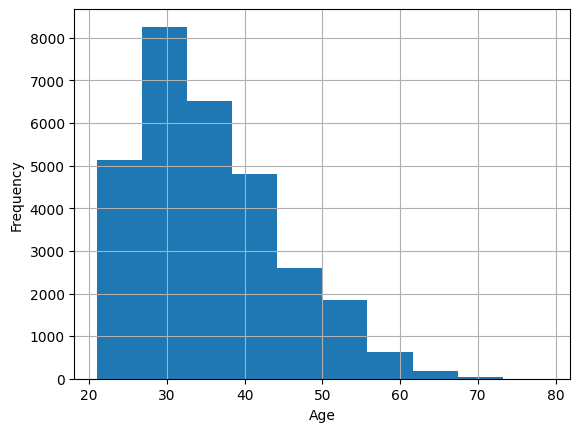

In [14]:
# Numerical Variable - Age
df.AGE.hist()
xlabel = plt.xlabel("Age")
ylabel = plt.ylabel("Frequency")


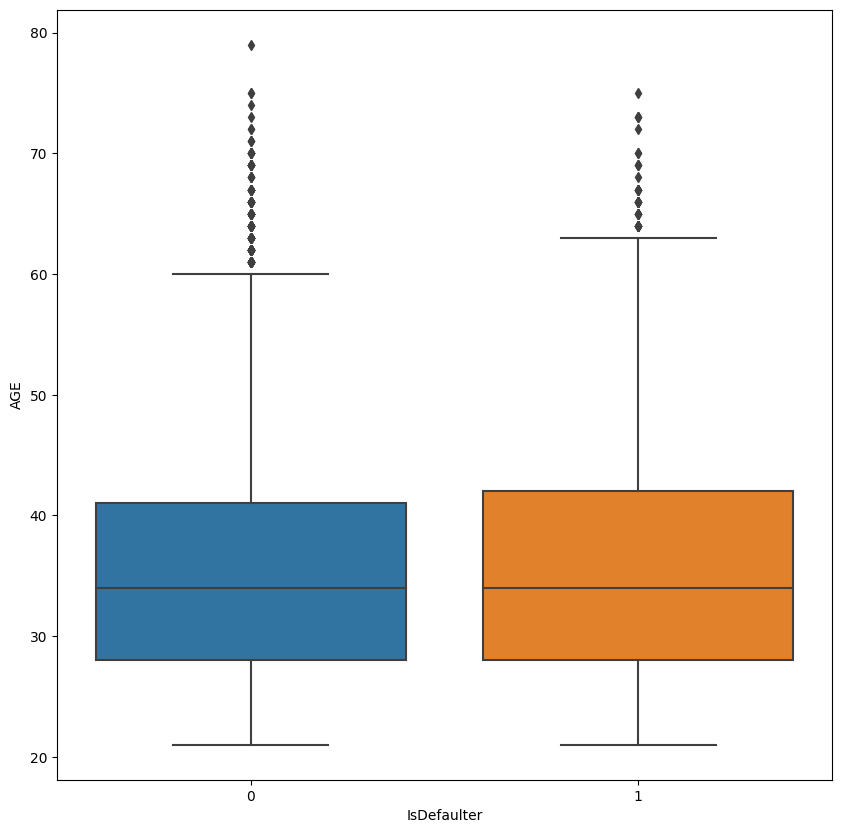

In [15]:
df.groupby('IsDefaulter')['AGE'].mean()
df = df.astype('int')
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="AGE", data=df)

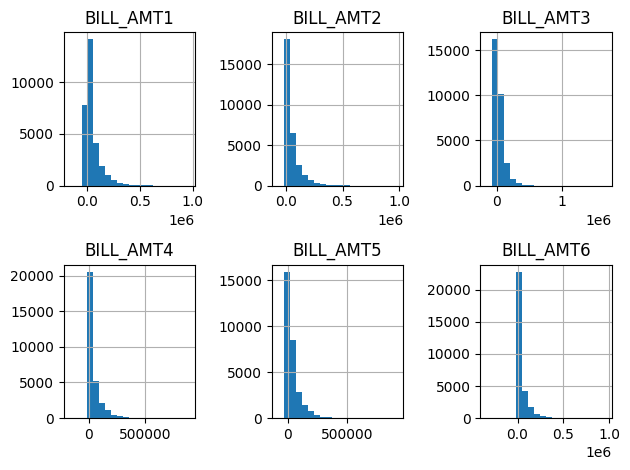

In [16]:
# Numerical Variable - Bill Amount

bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

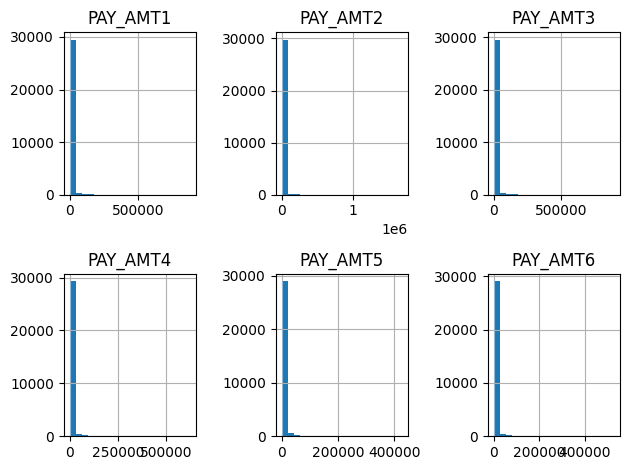

In [17]:
# Numerical Variable - Paid Amount
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

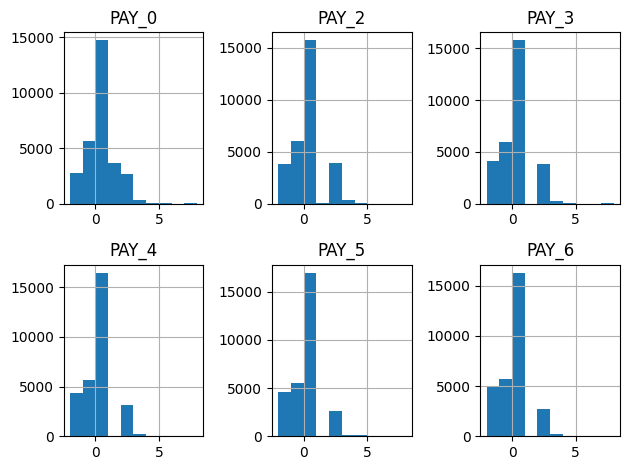

In [18]:

late = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

# this is probably more of a category

In [19]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


They all present an undocumented label -2. If 1,2,3, etc are the months of delay, 0 should be labeled 'pay duly' and every negative value should be seen as a 0.

## Selecting a training model

## Fine tuning our model

## Solution

Next? Launch, monitor, and maintain your system.

### Sources
1. https://www.kaggle.com/code/lucabasa/credit-card-default-a-very-pedagogical-notebook 
2. https://www.kaggle.com/code/bansodesandeep/credit-card-default-prediction 